# Analyzing Marketing Data
In this notebook we're going to explore some marketing data. Our source for the data is the IBM Watson Analytics repository and we're going to work with 3 data sets and primarily be concerned with decision trees. We're also going to focus on using just pandas and sklearn this time around (plus graphviz for plotting).

In [2]:
import pandas as pd                  #  Pandas is great for data wrangling

So we'll first need to get our environment set up and grab our data.  Then we'll transform it just a little bit.  Our goal today will be to see how the given factors affect the revenue amount so we will wind up using a regression tree.

In [3]:
dataA = pd.read_csv('WA.csv')
targets = dataA['SalesInThousands']
del dataA['SalesInThousands']
idents = dataA.columns.values.tolist()
print(idents)

['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week']


We've gotten our data arranged nicely now and also retrieved a list of the column names that we can use for wrestling with the dataframe. Now if we were to look at the Marketsize class we will find that it gives us classes of small, medium, or large, but in sklearn we need numerical data, so we'll have to do a little preprocessing to take care of that (the data file can be found at the end of the notebook if you would like to see it). Now one thing we should point out is that we have no knowledge of what most of our information means to the company the data comes from.  We don't know what kind of promotions they were running, what the location id means for an actual location, or even what the classes in market size really mean, like how large is a large market for this company. We're also going to see how this doesn't affect our predictive capabilities and in fact gives us a little more freedom as we are not considering other information that could bias us. For example, we know nothing of the cost of each promotion, whether they are direct mailers, tv advertisements, or online marketing campaigns. 

In [4]:
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()
cats = data.MarketSize.unique()
lenc.fit(cats)
data['MarketSize'] = lenc.transform(data['MarketSize']);
data.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,0.802920,479.656934,8.503650,2.029197,2.500000
std,2.877001,0.614742,287.973679,6.638345,0.810729,1.119055
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,0.000000,216.000000,4.000000,1.000000,1.750000
50%,6.000000,1.000000,504.000000,7.000000,2.000000,2.500000
75%,8.000000,1.000000,708.000000,12.000000,3.000000,3.250000
max,10.000000,2.000000,920.000000,28.000000,3.000000,4.000000


One thing that we'll want to take notice of is the number of locations. This will probably make a very broad tree (I tried it out and in fact it does) so we should also restrict the number of leaves to force the tree to try and group them somehow ( this process is rather appropriately called pruning). One drawback to this is that it will assume the store numbers are in some way sequentially ordered, but we'll see for now how it works out. As we are still exploring we will not worry for now about the so called horizon effect, the problem of deciding whether a tree is too broad or narrow.

In [5]:
print('There are ', len(data.LocationID.unique()),' locations')

There are  137  locations


In [8]:
from sklearn.tree import DecisionTreeRegressor
modela = DecisionTreeRegressor(criterion='mse', splitter='best', min_impurity_split=1e-13, max_leaf_nodes=20)

In [9]:
modela.fit(data,targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_split=1e-13, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now we've trained out model and if we had more store info we could predict their revenues, but our goal is to visualize how the different factors have affected the splitting. So let's plot our tree.

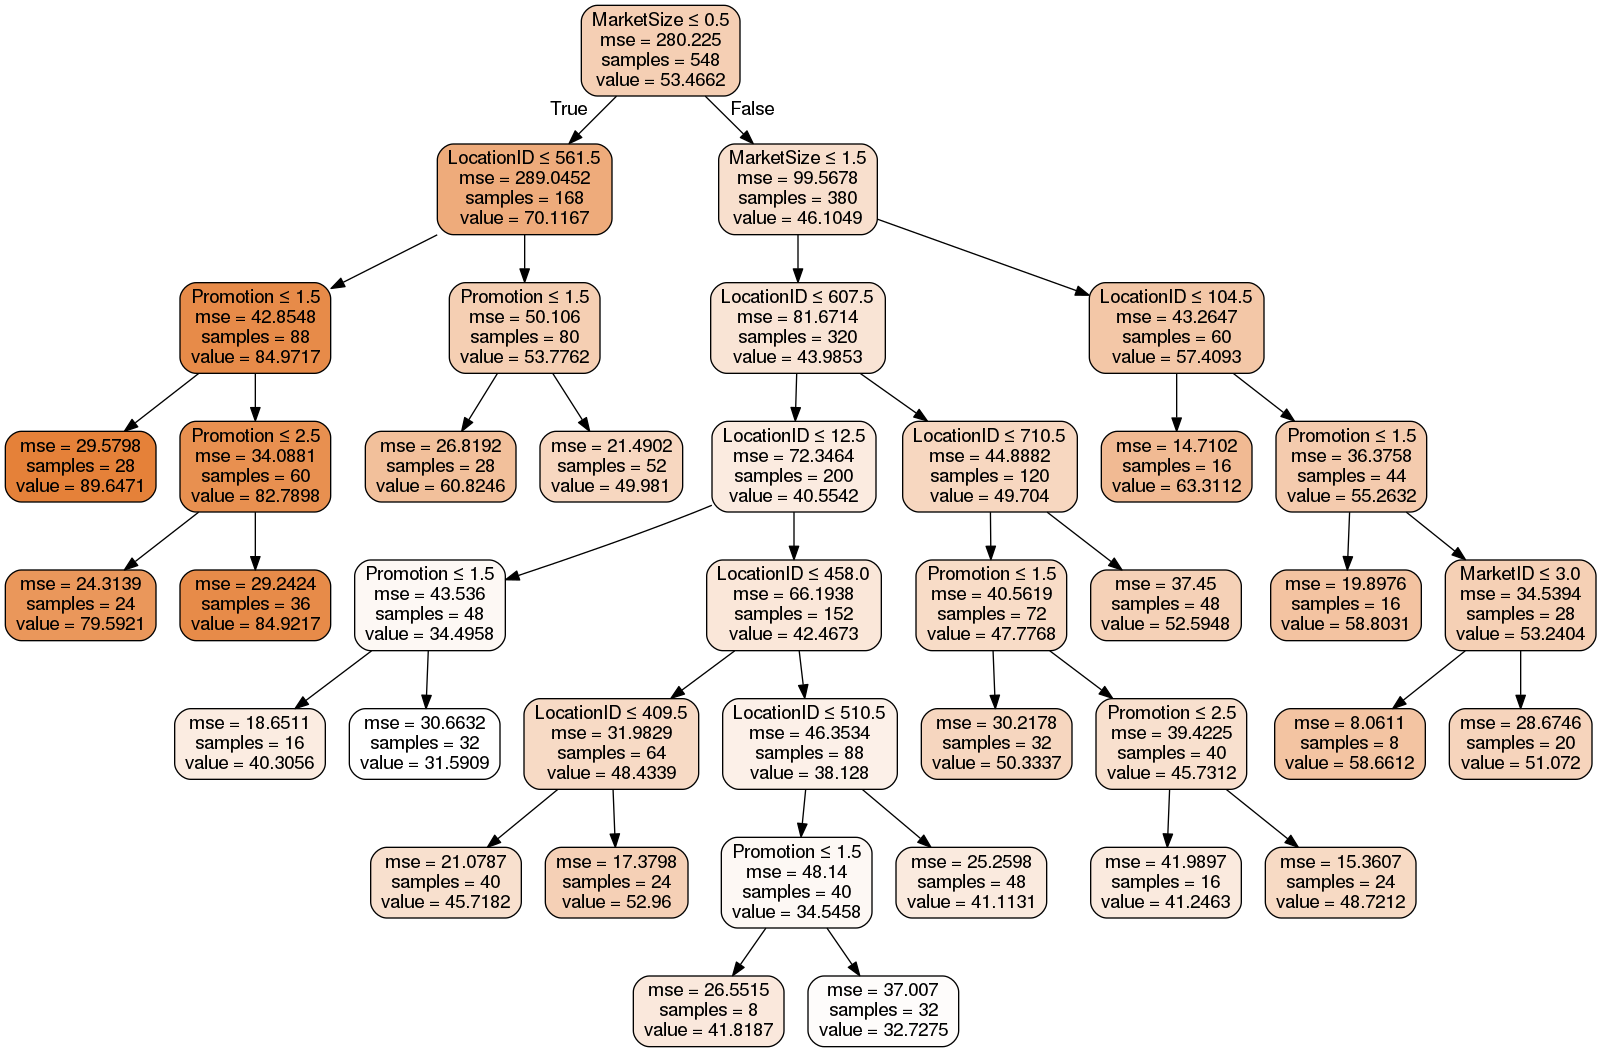

In [10]:
import pydotplus, graphviz
from sklearn.tree import export_graphviz

from IPython.display import Image 
dot_data = export_graphviz(modela, out_file=None, 
                         feature_names=idents, 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

So now we get a decision tree that lets us observe how the parameters we passed affect the outcome, basically breaking the model down by location, market, and promototion.  Next we'll take a look at the second data set and see how it compares.

In [16]:
dataB = pd.read_csv('WB.csv')
idents = dataB.columns.values.tolist()
print(idents, len(idents),'\n')
targets = dataB.ix[:,14]
del dataB['AmountSpent']
print('Particular instance \n',dataB.ix[1,:])
dataB.describe()

['storeid', 'HealthyStore', 'StoreSize', 'StoreLayout', 'customerID', 'gender', 'WhoShoppingFor', 'Vegetarian', 'ShoppingStyle', 'CouponUser', 'week', 'CouponSequence', 'CarryOver', 'CouponValue', 'AmountSpent'] 15 

Particular instance 
 storeid                               1
HealthyStore              Regular store
StoreSize                        Medium
StoreLayout                 No emphasis
customerID                   6193-QDKCN
gender                             Male
WhoShoppingFor          Self and spouse
Vegetarian                           No
ShoppingStyle     Often; what's on sale
CouponUser               From newspaper
week                                  2
CouponSequence                  2,4,1,3
CarryOver                             2
CouponValue                  25 percent
Name: 1, dtype: object


,storeid,week,CarryOver
count,1496.000000,1496.000000,1496.000000
mean,29.360963,2.500000,1.870989
std,17.108606,1.118408,1.451582
min,1.000000,1.000000,0.000000
25%,14.000000,1.750000,0.750000
50%,28.000000,2.500000,2.000000
75%,43.000000,3.250000,3.000000
max,60.000000,4.000000,4.000000


From the start, this dataset appears to be a more complicated situation involving several more categories of information, so we'll explore it in a separate notebook and start preselecting the features that we want to focus on.